In [1]:
import pandas as pd
import math
import numpy as np
import os
import sys
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
%matplotlib inline 
import seaborn as sns


## Dataset description 

This dataset contains 3 files:

1. diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables

2. diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

3. diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.


reference : https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [2]:
dataset_012 = pd.read_csv('diabetes_project/diabetes_012_health_indicators_BRFSS2015.csv')
dataset_50 = pd.read_csv('diabetes_project/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
dataset_h = pd.read_csv('diabetes_project/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
dataset_012.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
dataset_50.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [5]:
dataset_h.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [86]:
print(dataset_012.columns)
print(dataset_50.columns)
print(dataset_h.columns)

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='o

In [7]:
print(dataset_012.shape)
print(dataset_50.shape)
print(dataset_h.shape)

(253680, 22)
(70692, 22)
(253680, 22)


##  Considering dataset_05

In [8]:
dataset_50.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


In [9]:
dataset_50.groupby('Sex').size()

Sex
0.0    38386
1.0    32306
dtype: int64

In [10]:
print(dataset_50.groupby('HighBP').size())
print(dataset_50.groupby('Age').size())
print(dataset_50.groupby('HighBP').size())

HighBP
0.0    30860
1.0    39832
dtype: int64
Age
1.0       979
2.0      1396
3.0      2049
4.0      2793
5.0      3520
6.0      4648
7.0      6872
8.0      8603
9.0     10112
10.0    10856
11.0     8044
12.0     5394
13.0     5426
dtype: int64
HighBP
0.0    30860
1.0    39832
dtype: int64


array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

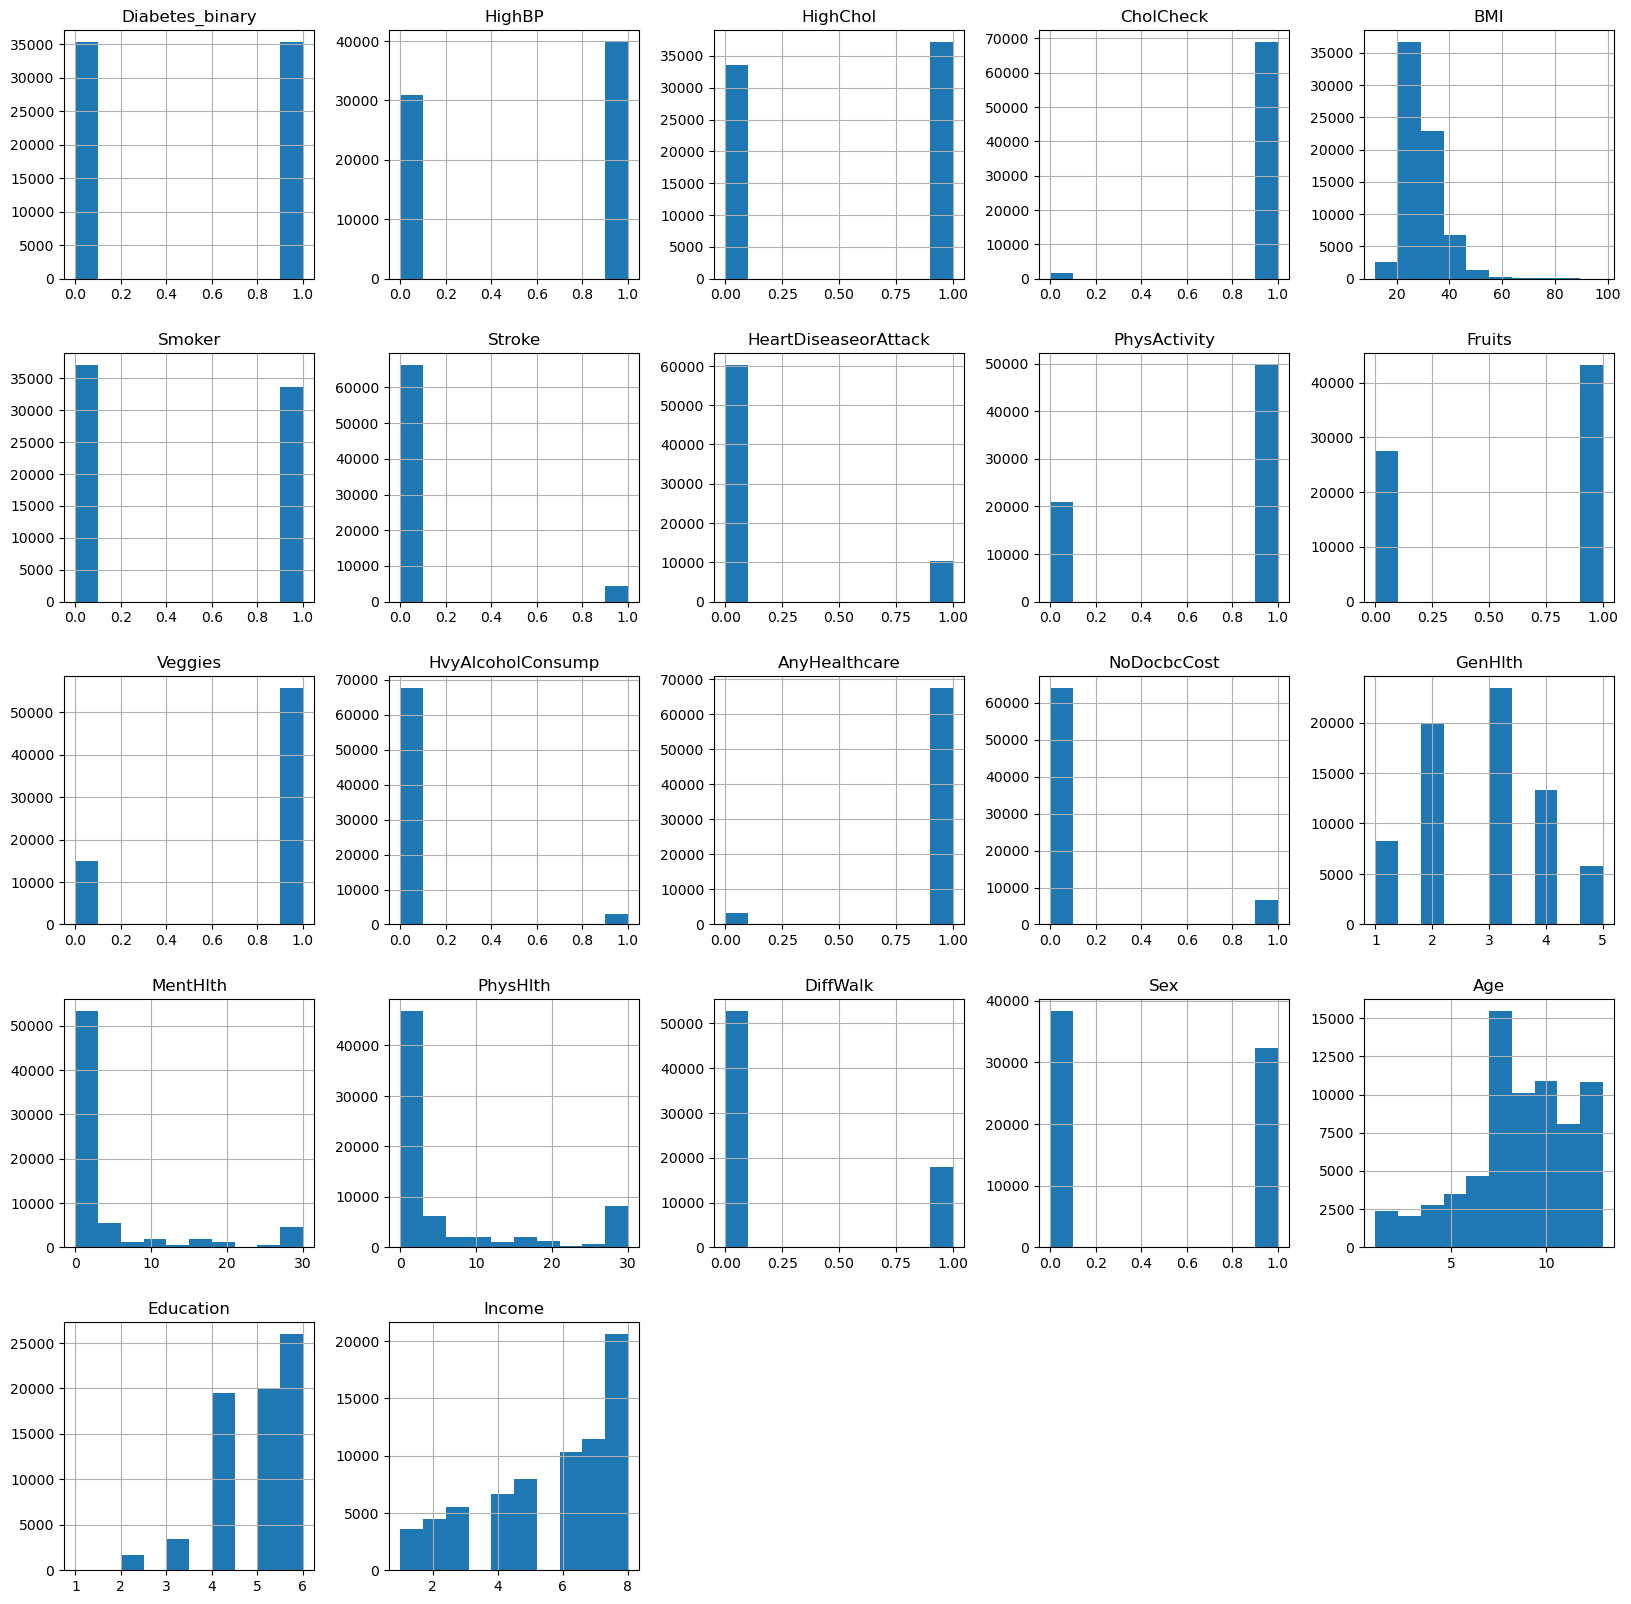

In [11]:
dataset_50.hist(figsize= (20,20))

In [12]:
from pandas.plotting import scatter_matrix

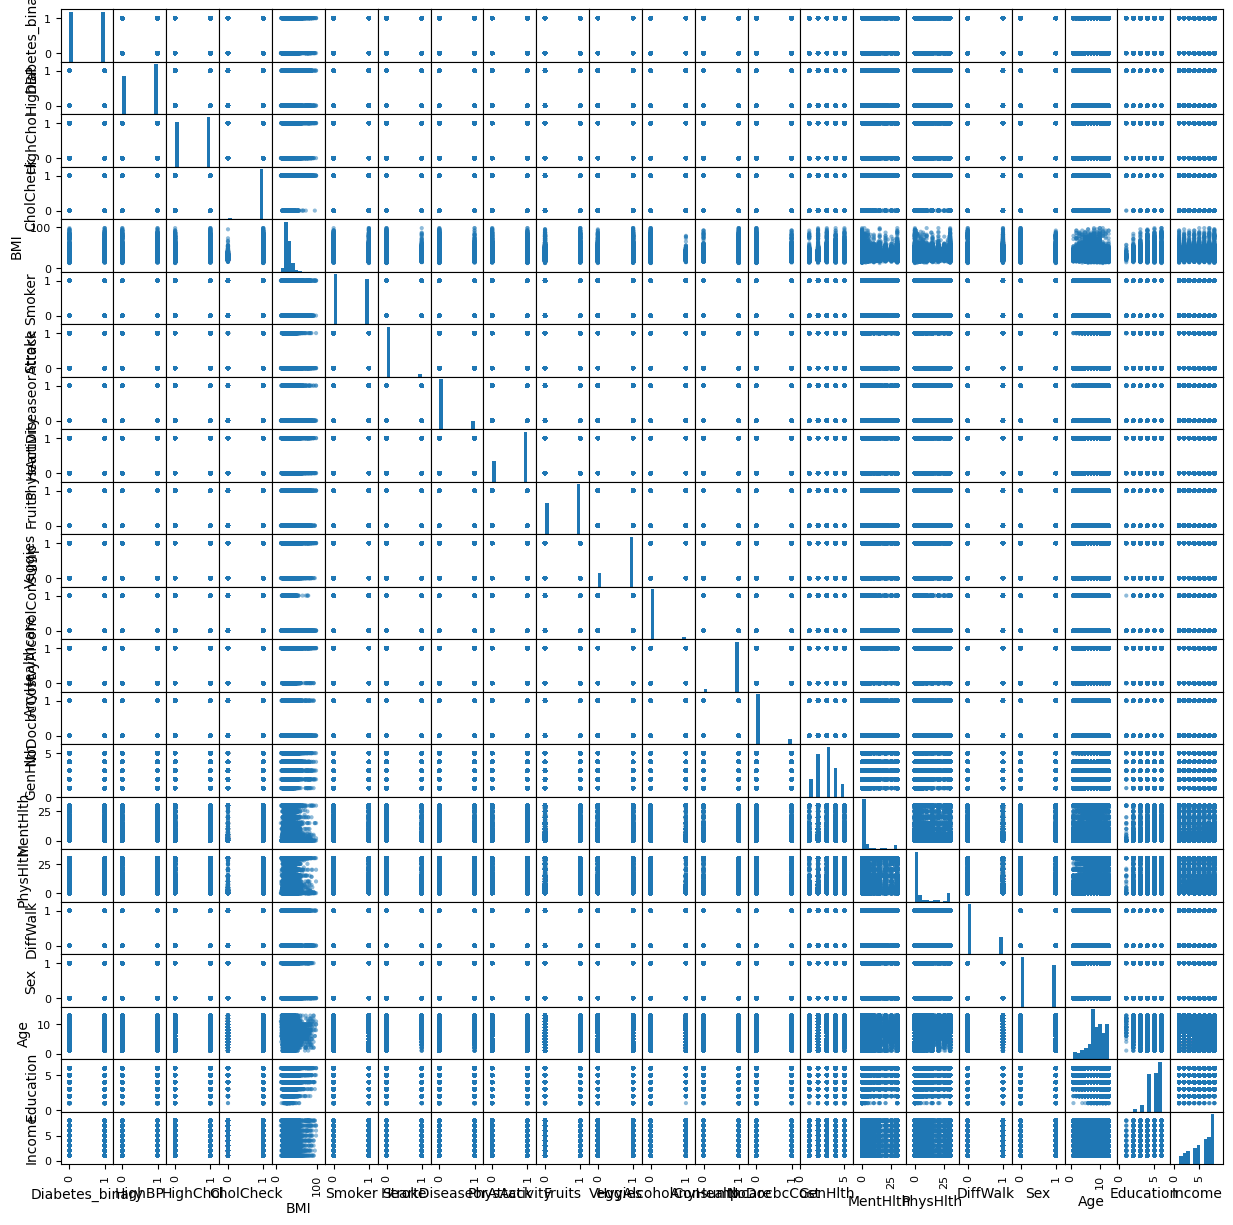

In [15]:
scatter_matrix(dataset_50, figsize=(15,15), range_padding= 0.5)
plt.show()

In [16]:
dataset_50.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [21]:
mod_dataset_50 = dataset_50.loc[:, ['Diabetes_binary','Sex', 'BMI', 'PhysHlth', 'MentHlth', 'Age', 'Education',
       'Income' ]]

In [22]:
mod_dataset_50.head()

,Diabetes_binary,Sex,BMI,PhysHlth,MentHlth,Age,Education,Income
0,0.0,1.0,26.0,30.0,5.0,4.0,6.0,8.0
1,0.0,1.0,26.0,0.0,0.0,12.0,6.0,8.0
2,0.0,1.0,26.0,10.0,0.0,13.0,6.0,8.0
3,0.0,1.0,28.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,29.0,0.0,0.0,8.0,5.0,8.0


<Axes: xlabel='Diabetes_binary', ylabel='count'>

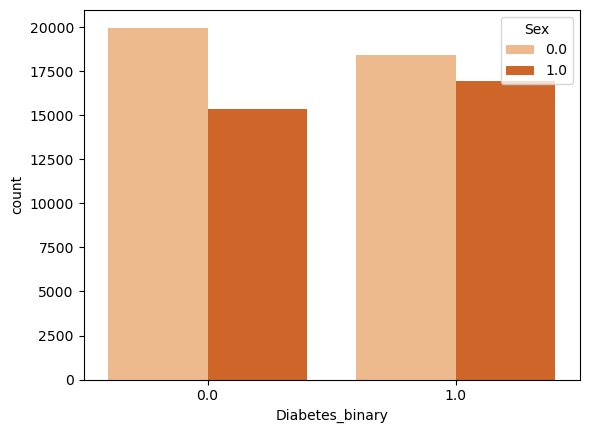

In [34]:
sns.countplot(mod_dataset_50, x='Diabetes_binary', hue='Sex', palette ='Oranges')

<Axes: xlabel='Diabetes_binary', ylabel='count'>

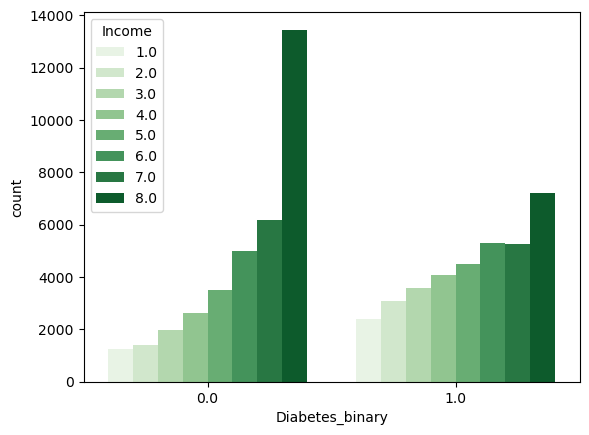

In [33]:
sns.countplot(mod_dataset_50, x='Diabetes_binary', hue='Income', palette ='Greens')

<Axes: xlabel='Diabetes_binary', ylabel='count'>

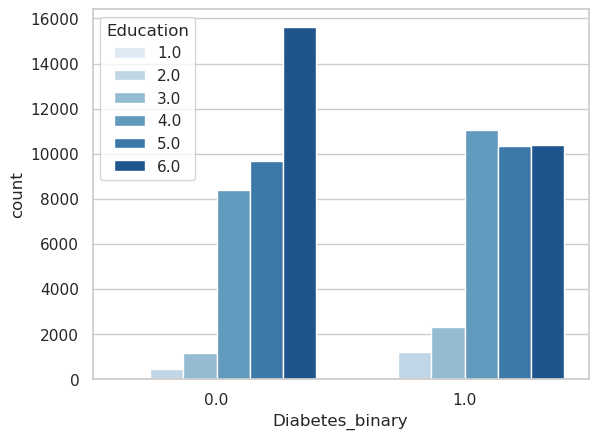

In [84]:
sns.countplot(mod_dataset_50, x='Diabetes_binary', hue='Education', palette ='Blues')

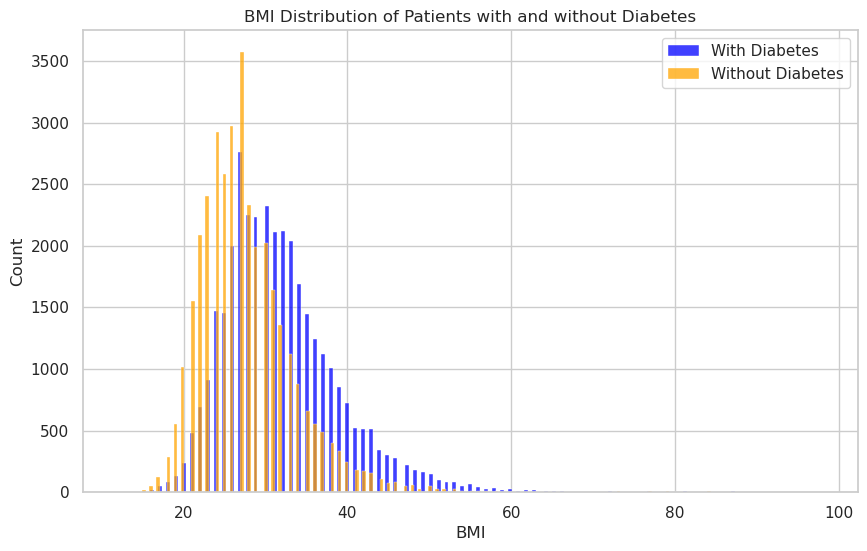

In [115]:
# 'Diabetes_binary' column contains values '1'= Yes or '0' = No indicating whether the patient has the disease

# Filter the data for patients with the disease
diabetic_data = mod_dataset_50[mod_dataset_50['Diabetes_binary'] == 1]

# Filter the data for patients without the disease
no_diabetic_data = mod_dataset_50[mod_dataset_50['Diabetes_binary'] == 0]

# Create the column chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the age distribution for patients with disease
sns.histplot(data=diabetic_data, x='BMI', color='blue', label='With Diabetes')

# Plot the age distribution for patients without disease
sns.histplot(data=non_diabetic_data, x='BMI', color='orange', label='Without Diabetes')

# Set the chart title and labels

plt.title('BMI Distribution of Patients with and without Diabetes')
plt.xlabel('BMI')
plt.ylabel('Count')

# Display the legend
plt.legend()

# Show the chart
plt.show()


If your BMI is 18.5 to 24.9, it falls within the Healthy Weight range. If your BMI is 25.0 to 29.9, it falls within the overweight range. If your BMI is 30.0 or higher, it falls within the obese range.


<Axes: >

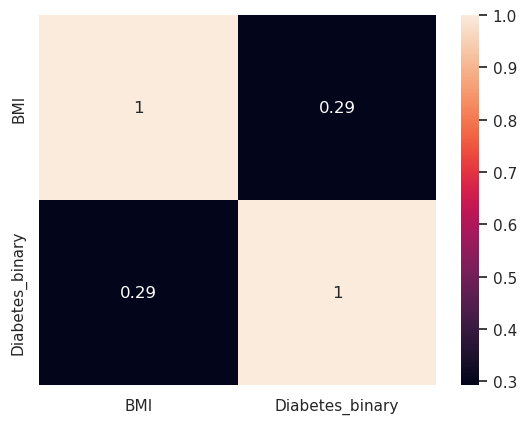

In [116]:
correlation_matrix = mod_dataset_50[['BMI', 'Diabetes_binary']].corr()
sns.heatmap(correlation_matrix, annot= True)

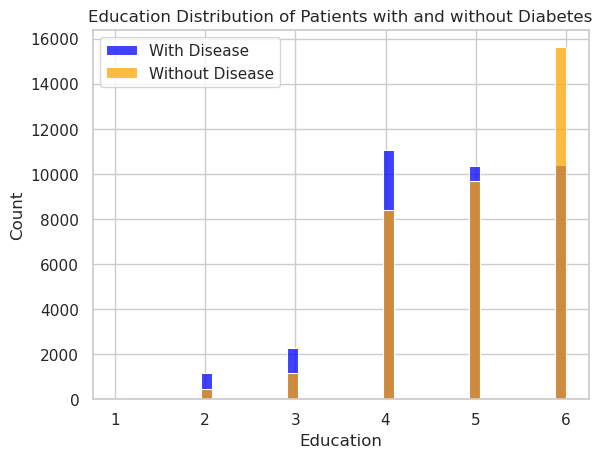

In [117]:
# Plot the age distribution for patients with disease
sns.histplot(data=disease_data, x='Education', color='blue', label='With Disease')

# Plot the age distribution for patients without disease
sns.histplot(data=no_disease_data, x='Education', color='orange', label='Without Disease')

# Set the chart title and labels
plt.title('Education Distribution of Patients with and without Diabetes')
plt.xlabel('Education')
plt.ylabel('Count')

# Display the legend and chart
plt.legend()
plt.show()


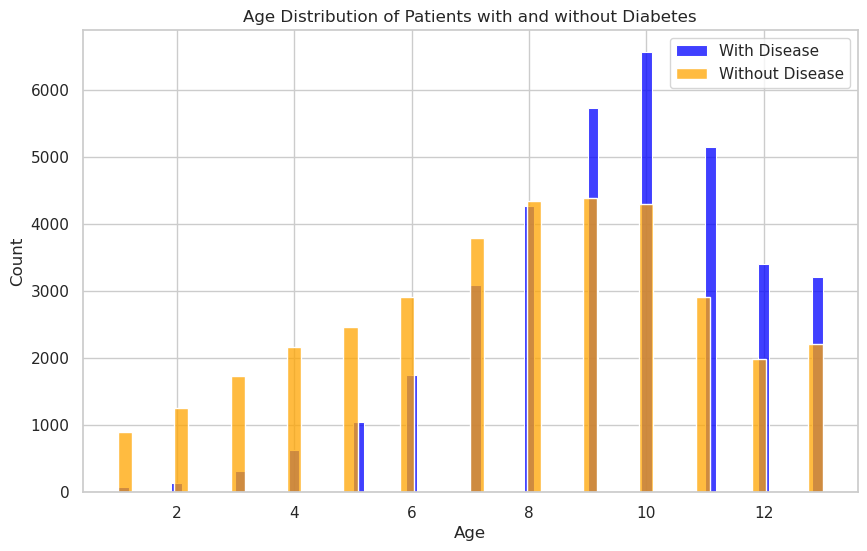

In [118]:
# Create the column chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the age distribution for patients with disease
sns.histplot(data=disease_data, x='Age', color='blue', label='With Disease')

# Plot the age distribution for patients without disease
sns.histplot(data=no_disease_data, x='Age', color='orange', label='Without Disease')

# Set the chart title and labels
plt.title('Age Distribution of Patients with and without Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the legend and chart
plt.legend()
plt.show()


<Axes: >

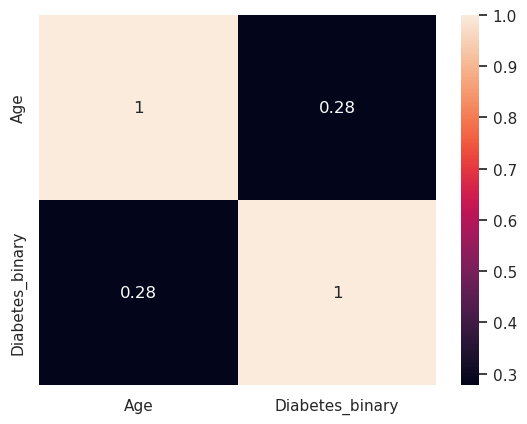

In [119]:
correlation_matrix = mod_dataset_50[['Age', 'Diabetes_binary']].corr()
sns.heatmap(correlation_matrix, annot= True)

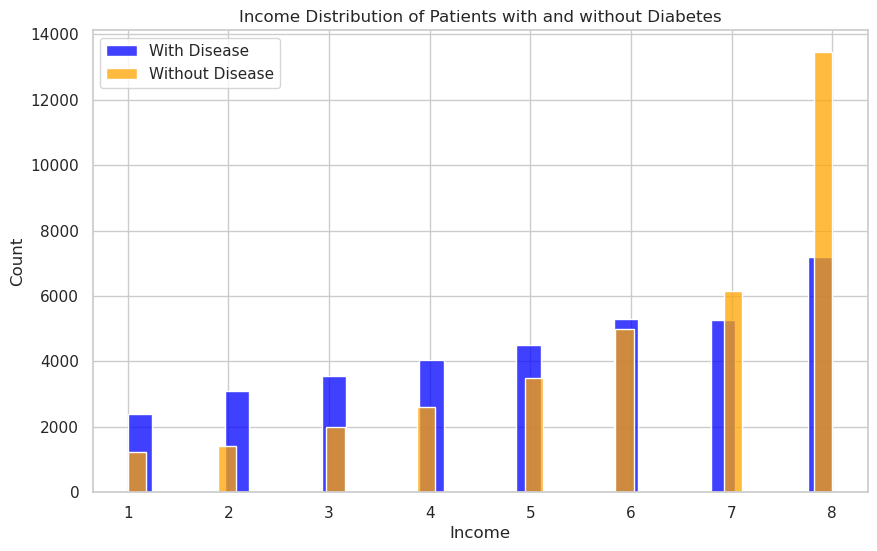

In [120]:
# Create the column chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the age distribution for patients with disease
sns.histplot(data=disease_data, x='Income', color='blue', label='With Disease')

# Plot the age distribution for patients without disease
sns.histplot(data=no_disease_data, x='Income', color='orange', label='Without Disease')

# Set the chart title and labels
plt.title('Income Distribution of Patients with and without Diabetes')
plt.xlabel('Income')
plt.ylabel('Count')

# Display the legend and chart
plt.legend()
plt.show()


<Axes: >

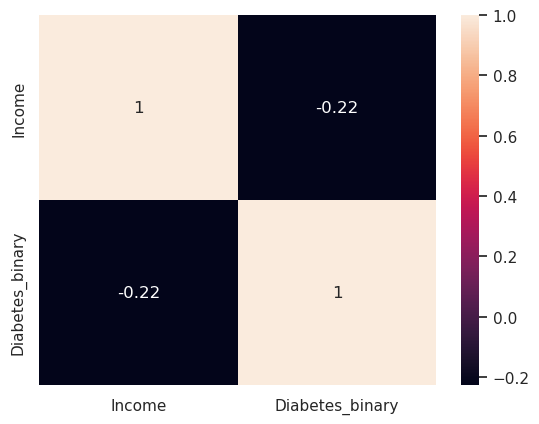

In [121]:
correlation_matrix = mod_dataset_50[['Income', 'Diabetes_binary']].corr()
sns.heatmap(correlation_matrix, annot= True)

In [122]:
mod_dataset_50.columns

Index(['Diabetes_binary', 'Sex', 'BMI', 'PhysHlth', 'MentHlth', 'Age',
       'Education', 'Income'],
      dtype='object')

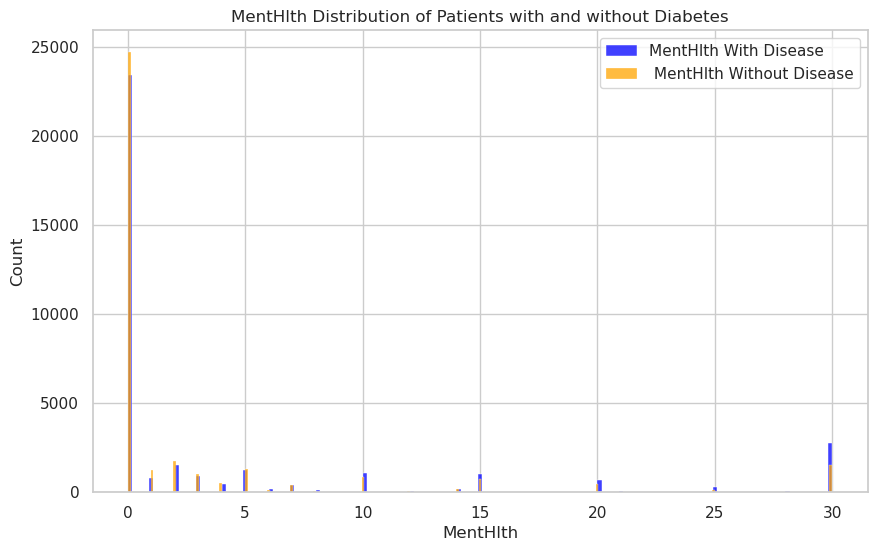

In [123]:
# Create the column chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the age distribution for patients with disease
sns.histplot(data=disease_data, x='MentHlth', color='blue', label='MentHlth With Disease')

# Plot the age distribution for patients without disease
sns.histplot(data=no_disease_data, x='MentHlth', color='orange', label=' MentHlth Without Disease')

# Set the chart title and labels
plt.title('MentHlth Distribution of Patients with and without Diabetes')
plt.xlabel('MentHlth')
plt.ylabel('Count')

# Display the legend and chart
plt.legend()
plt.show()

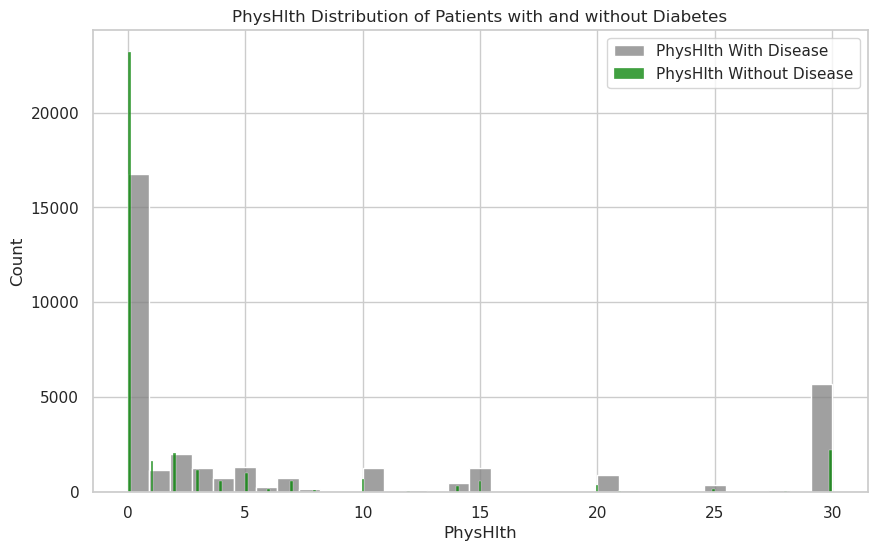

In [124]:
# Create the column chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the age distribution for patients with disease
sns.histplot(data=disease_data, x='PhysHlth', color='grey', label='PhysHlth With Disease')

# Plot the age distribution for patients without disease
sns.histplot(data=no_disease_data, x='PhysHlth', color='green', label='PhysHlth Without Disease')

# Set the chart title and labels
plt.title('PhysHlth Distribution of Patients with and without Diabetes')
plt.xlabel('PhysHlth')
plt.ylabel('Count')

# Display the legend and chart
plt.legend()
plt.show()


In [126]:
mod_dataset_50.columns

Index(['Diabetes_binary', 'Sex', 'BMI', 'PhysHlth', 'MentHlth', 'Age',
       'Education', 'Income'],
      dtype='object')

In [169]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

array = mod_dataset_50.values
X = array[:,1:7] 
# ':' in this context means we want to include all rows of the array is used to separate the indexing for different axes of the array. 
# In this case ',' it separates the indexing for rows and columns.

y = array[:,0]


In [170]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 42)

In [171]:
# List of models
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [172]:
result = []
scoring = 'accuracy'
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state= 42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.698222 (0.008698)
LDA: 0.697052 (0.009969)
KNN: 0.661310 (0.004823)
CART: 0.636319 (0.005934)
NB: 0.655690 (0.008511)
RF: 0.667214 (0.005598)
